# Part I - Flights Data Exploration
## by Neibo Augustine Olobo

## Introduction
> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays. The description is posted on their website in detail.

>For this data analysis, we will be looking at data from the years 2005 to 2007.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Read CSV files for years 2005,2006 and 2007 into individual dataframes
df_2007=pd.read_csv('2007.csv')
df_2006=pd.read_csv('2006.csv')
df_2005=pd.read_csv('2005.csv')

In [3]:
#concatenate all three dataframes and save into master df
df_data=pd.concat([df_2005,df_2006,df_2007])

In [4]:
df_data.shape

(21735733, 29)

In [5]:
df_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Cleaning

In [6]:
#Changing column names to make it more meaningful and usable in later stages
df_data=df_data.rename(columns={'Year':'year','Month':'month','DayofMonth':'day_of_month','DayOfWeek':'day_of_week','DepTime':'departure_time','CRSDepTime':'crs_departure_time','ArrTime':'arrival_time','CRSArrTime':'crs_arrival_time','UniqueCarrier':'unique_carrier','FlightNum':'flight_number','TailNum':'tail_number','ActualElapsedTime':'actual_elapsed_time','CRSElapsedTime':'crs_elapsed_time','AirTime':'air_time','ArrDelay':'arrival_delay','DepDelay':'departure_delay','Origin':'origin','Dest':'destination','Distance':'distance','TaxiIn':'taxi_in','TaxiOut':'taxi_out','Cancelled':'cancelled','CancellationCode':'cancellation_code','Diverted':'diverted','CarrierDelay':'carrier_delay','WeatherDelay':'weather_delay','NASDelay':'nas_delay','SecurityDelay':'security_delay','LateAircraftDelay':'late_aircraft_delay'})

In [7]:
#Checking what df_data looks like
df_data.head()

,year,month,day_of_month,day_of_week,departure_time,crs_departure_time,arrival_time,crs_arrival_time,unique_carrier,flight_number,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


### What is the structure of your dataset?

> This dataset has 21735733 rows and 29 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features are factors that are responsible for causing delays and cancellations. These will be used to gauge the on time performance and characteristics of flights to different destinations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features of interest are factors that are attributed to delays in arrival and departure (given in time, minutes) and cancellation codes and reasons. We can tie these up to flight carriers and destination see if we can spot patterns and relationships.

### How the data is to be analyzed
> The analysis will be divided into two parts: cancellations and delays. These parts will serve as the foundation for the presentation's narrative.

## Univariate Exploration

> This section explores univariate data to see what their distributions look like. Every section has a question associated with it and every plot is followed by analysis of the question.


In [8]:
#Lets first create a function that will rename x,y axis and chart title. We can re-use this function since we will be doing a lot of plots.

def chart_labels(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

## 1st Plot

First, lets take a look at the distribution of cancellation causes. This will give us a fair idea of the most occurring causes of flight cancellations.

### Which cancellation reason is most common?

In [9]:
df_data['cancellation_code'].value_counts()

A    181784
B    151054
C     83288
D       288
Name: cancellation_code, dtype: int64

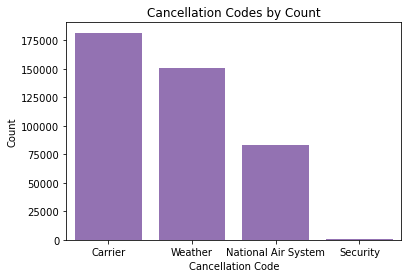

In [10]:
#Getting distribution using Seaborn bar plot 

#Define Plot
color=sb.color_palette()[4]
plot=sb.countplot(data=df_data,x='cancellation_code',color=color,order=['A','B','C','D'])
chart_labels('Cancellation Code','Count','Cancellation Codes by Count')
plot.set_xticklabels(['Carrier','Weather','National Air System','Security']);

From the graph above, it is clear that Carrier and Weather are the highest reasons for flight cancellations.

## 2nd Plot

### Which carrier had the most cancellations?
>Once we have looked at the top reasons for cancellations, we can move on to see which carrier had the most cancellations. This can be observed by a bar plot for carrier codes for which flights were cancelled.

Note: Delays/cancellations due to cancellation code "D" is way less than other codes that it is almost zero on the bar chart.

In [11]:
#Getting a subset of dataframe that contains only cancellation date
df_data_sub=df_data.query('cancellation_code in ["A","B","C","D"]')

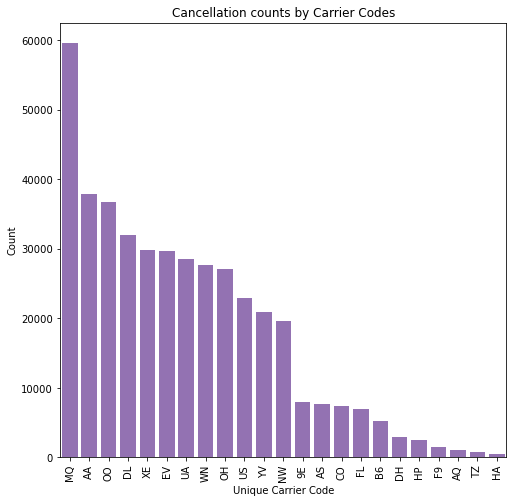

In [12]:
#Getting distribution of carriers that had most cancellations

#Saving value counts for various carriers 
carriers_cancellations=df_data_sub.unique_carrier.value_counts()

base_color=sb.color_palette()[4]
plt.figure(figsize=(8,8))
plot=sb.countplot(data=df_data_sub,x='unique_carrier',color=base_color,order=carriers_cancellations.index)
plot.set_xticklabels(labels=carriers_cancellations.index,rotation=90)
chart_labels('Unique Carrier Code','Count','Cancellation counts by Carrier Codes')

The plot above shows that MQ, AA, OO and DL are the top four carriers with highest cancellations.

## 3rd Plot

### Which month of the year had most cancellations?

In [13]:
df_data_sub['month'].value_counts()

1     50649
12    50339
2     46263
7     38092
6     37247
8     35530
3     34632
10    29201
9     27989
4     25274
11    21423
5     19775
Name: month, dtype: int64

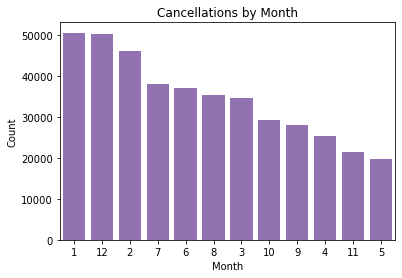

In [14]:
#Define Plot
month_counts=df_data_sub.month.value_counts()
sb.countplot(data=df_data_sub,x='month',color=base_color,order=month_counts.index)
chart_labels('Month','Count','Cancellations by Month');

The months of January and December has more cancellations

## 4th Plot

### What does the distribution of arrival delays look like?
Now, lets take a look at arrival delays by day of the month. We will use a histogram.

In [15]:
#Filtering only data with arr_delay information, excluding NaN
df_arrival_delay=df_data[df_data.arrival_delay.notnull()]

We will plot a histogram of arrival delays. Since most of the data is concentrated between -50 and 300 we will set the x limits accordingly.

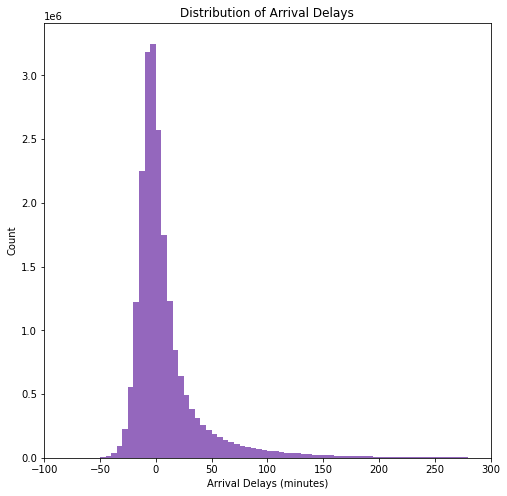

In [16]:
#Define plot
plt.figure(figsize=(8,8))
bin_edges=np.arange(-50,300,5)
plt.hist(df_arrival_delay.arrival_delay,bins=bin_edges,color=base_color)
plt.xlim(-100,300)
chart_labels('Arrival Delays (minutes)','Count','Distribution of Arrival Delays')

From the histogram we can see that most of the delays are concentrated between 0 and 50 minutes. The distribution is skewed to the right.

## 5th Plot

### What does the distribution of departure delays look like?

Now, lets take a look at the distribution of departure delays.

In [17]:
#Filtering only data with arrival_delay information, excluding NaN
df_departure_delay=df_data[df_data.departure_delay.notnull()]

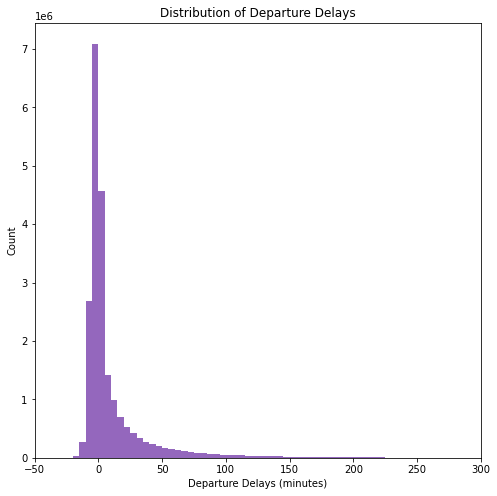

In [18]:
#Define plot
plt.figure(figsize=(8,8))
bin_edges=np.arange(-50,300,5)
plt.hist(df_departure_delay.departure_delay,bins=bin_edges,color=base_color)
plt.xlim(-50,300)
chart_labels('Departure Delays (minutes)','Count','Distribution of Departure Delays')

The histogram above shows the distribution of departure delays. From the graph, it can be observed that most of the delays are between 0 and 50. The graph is skewed to the right.

## 6th Plot

### Which carriers had the highest delays at arrivals?

In [19]:
#Group by carrier codes and get sum of delayes for each carrier
delays_carrier=df_arrival_delay.groupby('unique_carrier').arrival_delay.sum().sort_values(ascending=False)

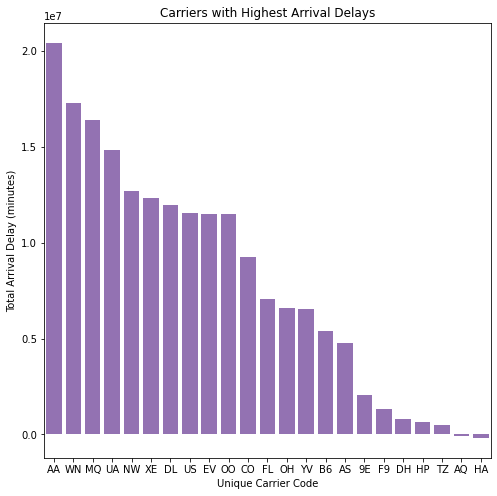

In [20]:
#Define bar plot

plt.figure(figsize=(8,8))
base_color=sb.color_palette()[4]
sb.barplot(x=delays_carrier.index,y=delays_carrier.values,color=base_color)
chart_labels('Unique Carrier Code','Total Arrival Delay (minutes)','Carriers with Highest Arrival Delays')

From the plot it can be seen that American Airlines has the highest arrival delays

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the graphs above, we explored cancellation codes, carrier codes with cancellations and month of the year when cancellations were hightest.

> Cancellation code "D" (Security) is very less as compared to other codes. This means there have been very few instances of delays/cancellations due to security reasons.

> We also explored delays in departure and arrival of flights to understand their distribution. We had to transform the histogram for these by placing limits on x axis since most of the data is concentrated there.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To explore the carriers that had cancellations, we modified the original dataset and filtered only those rows that had cancellations (A,B,C or D). We would then be able to determine and observe cancellations by carriers.

> To explore delays, we created new dataframes that excluded missing values in delays to plot histogram.

## Bivariate Exploration

> In this section, we will investigate relationships between two variables.

## 7th Plot

### For each cancellation code (reason) which month had the most cancellations? Does this information convey anything about seasons?

This is an extension of the univariate plot where we were trying to see which months had most cancellations.

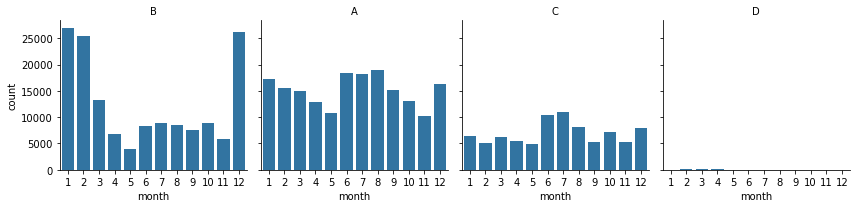

In [21]:
#Define plot
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
plot=sb.FacetGrid(data=df_data_sub,col='cancellation_code')
plot.map(sb.countplot,'month',order=month_order)
plot.set_titles("{col_name}");

The plot above for "B" shows that the months of December, January, February and March had most cancellations. This can be due to bad weather (Since "B" is cancellations due to weather)

## 8th Plot

### What is the relationship between departure and arrival delays?

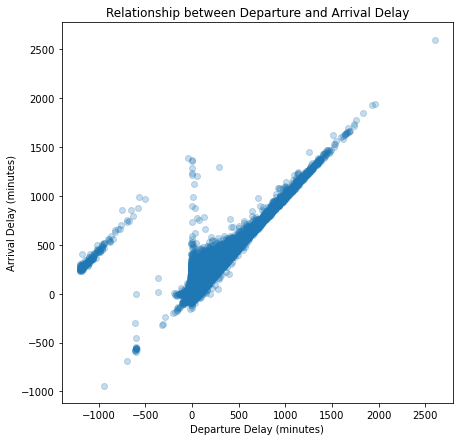

In [22]:
#Define plot
plt.figure(figsize=(7,7))
plt.scatter(data=df_data.query('cancelled==0'),x='departure_delay',y='arrival_delay',alpha=1/4)
chart_labels('Departure Delay (minutes)','Arrival Delay (minutes)','Relationship between Departure and Arrival Delay')

The plot above shows a linear relationship between departure and arrival delays.

## 9th Plot

### What is the relationship between arrival time and arrival delays?

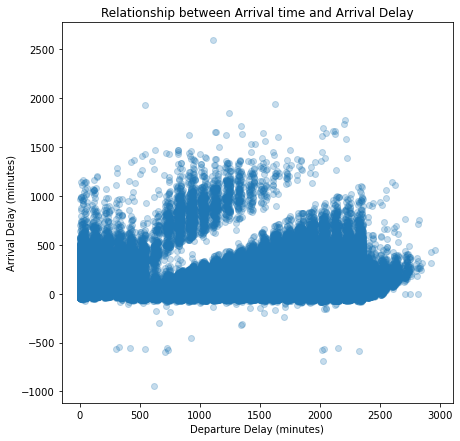

In [23]:
#Define plot
plt.figure(figsize=(7,7))
plt.scatter(data=df_data.query('cancelled==0'),x='arrival_time',y='arrival_delay',alpha=1/4)
chart_labels('Departure Delay (minutes)','Arrival Delay (minutes)','Relationship between Arrival time and Arrival Delay')

The plot above shows a none linear relationship between arrival time and arrival delays.

## 10th Plot

### What is the relationship between departure delay and taxi out time?

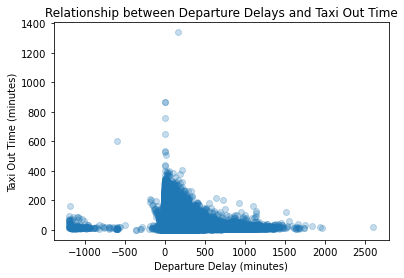

In [24]:
#Define plot
plt.scatter(data=df_data.query('cancelled==0'),x='departure_delay',y='taxi_out',alpha=1/4)
chart_labels('Departure Delay (minutes)','Taxi Out Time (minutes)','Relationship between Departure Delays and Taxi Out Time')

There is no linear relationship between departure delay and taxi out time.

## 11th Plot

### What is the relationship between arrival delay and taxi in time?

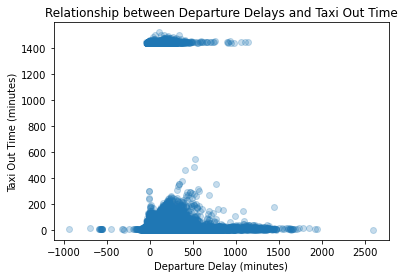

In [25]:
#Define plot
plt.scatter(data=df_data.query('cancelled==0'),x='arrival_delay',y='taxi_in',alpha=1/4)
chart_labels('Departure Delay (minutes)','Taxi Out Time (minutes)','Relationship between Departure Delays and Taxi Out Time')

There is no linear relationship between arrival delay and taxi in time.

## 12th Plot

### What does each carrier's performance looks like in terms of on time arrivals?

Lets prepare a stacked bar chart that shows each carrier's on time performance.

*Note*: For on time performance calculations, we will remove all cancelled flights since we only want to gauge flights that took off.

We will use "arrival_delay" for this calculation. the flights that have arrival_delays>0 were delayed. We will get the proportion of flights (for each carrier) that made it on time.

In [26]:
#Getting a dataframe with number of flights that were delayed and not cancelled by each carrier
arrival_delayed=df_departure_delay.query('cancelled==0 & arrival_delay>0').groupby('unique_carrier').size().reset_index(name='delayed_flights')

In [27]:
#Getting a dataframe with number of total flights that took off (not cancelled)
uncancelled_flights=df_data.query('cancelled==0').groupby('unique_carrier').size().reset_index(name='total_flights')

In [28]:
#Merging both dataframes on unique_carrier_code
df_merged_delay=pd.merge(arrival_delayed,uncancelled_flights,on='unique_carrier')

In [29]:
#Calculating the percentage of delayed flights
df_merged_delay['delayed_percent']=df_merged_delay['delayed_flights']/df_merged_delay['total_flights']*100

In [30]:
#Creating a new column on time percentage
df_merged_delay['on_time_percent']=100-df_merged_delay.delayed_percent
df_merged_delay=df_merged_delay.sort_values(by='delayed_percent',ascending=False)

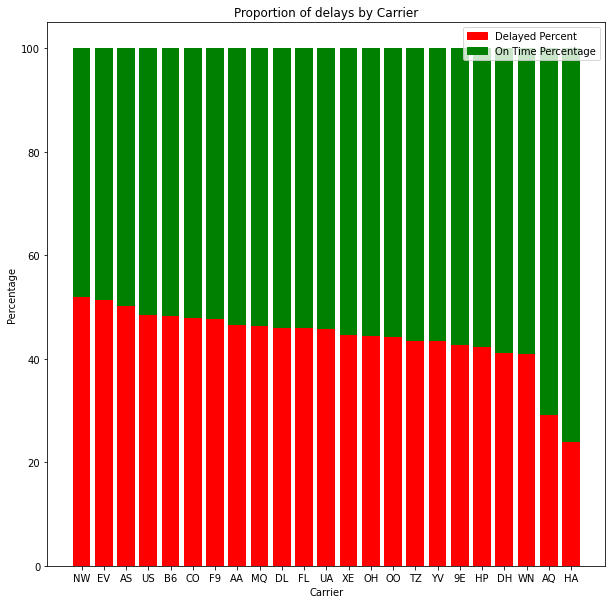

In [31]:
#Define plot
plt.figure(figsize=(10,10))
plt.bar(data=df_merged_delay,x='unique_carrier',height='on_time_percent',color='green',bottom=df_merged_delay.delayed_percent)
plt.bar(data=df_merged_delay,x='unique_carrier',height='delayed_percent',color='red')
red_patch=mpatches.Patch(color='red',label='Delayed Percent')
green_patch=mpatches.Patch(color='green',label='On Time Percentage')
chart_labels('Carrier','Percentage','Proportion of delays by Carrier')
plt.legend(handles=[red_patch,green_patch]);

The red bars show delays as a percentage of total flights for each carrier. Larger the red bar, worse the performance.

## 13th Plot

### What is the relationship between flight distances and mean arrival delay?

In [32]:
#Pandas series with average arrival delay by distance
distance_arrival=df_data.query('arrival_delay>0').groupby('distance')['arrival_delay'].mean()

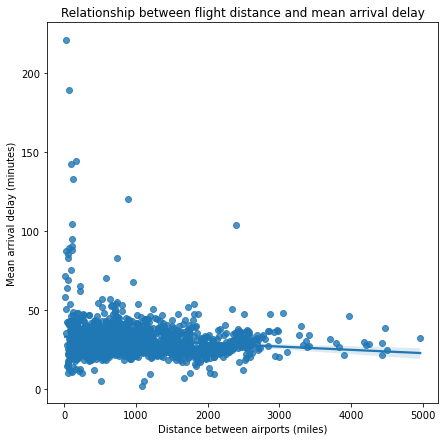

In [33]:
plt.figure(figsize=(7,7))

#Converting the series for seaborn plotting
x,y=pd.Series(distance_arrival.index,name='distance'),pd.Series(distance_arrival.values,name='average_arrival_delay')
sb.regplot(x=x,y=y)
chart_labels('Distance between airports (miles)','Mean arrival delay (minutes)','Relationship between flight distance and mean arrival delay')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the graph above, we can see that there is no increasing or decreasing trend in average delay as the distance between airports increases.

> We found a linear relationship between departure and arrival delays. No such relationship was found between departure delay and taxi out time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between departure and arrival delays needs to be further analyzed in mutlivariate exploration. Particularly, we need to see if there is pattern in taxi out time and departure delays due to bad weather conditions and so on. Correlation from the plot cannot definitively imply causation.

## Multivariate Exploration

> In this section, we will continue investigating our variables of interest. This time we will introduce three variables to see if there is a relationship.

## 14th Plot

### Does the number of flights to destinations have an effect on arrival delays?

In [34]:
#Creating two series that groups by destination and gets number of flights and average arrival delay for each destination
group_destination=df_data.groupby('destination').size().sort_values(ascending=False)
group_arrival=df_data.groupby('destination')['arrival_delay'].mean()

In [35]:
#Create a dataframe of top 50 busiest airports and average arrival delays for each by destination
delay_destination=pd.concat([group_destination,group_arrival],axis=1).reset_index()
delay_destination.columns=['destination','flights','avg_arrival_delay']

In [36]:
#Sorting number of flight values by descending order (busiest destinations first)
delay_destination=delay_destination.sort_values('flights',ascending=False)

In [37]:
#Feature Engineering: Create a new column 'top_destinations' to create two groups: Top 50 and Rest
delay_destination['top_destinations']=np.nan

In [38]:
#Setting new column for top 50 
delay_destination.iloc[:50,3]='Rank 1-50'

In [39]:
#Setting new column for rest 
delay_destination.iloc[50:100,3]='Rank 51-100'

C:\Users\AUGUSTINE\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


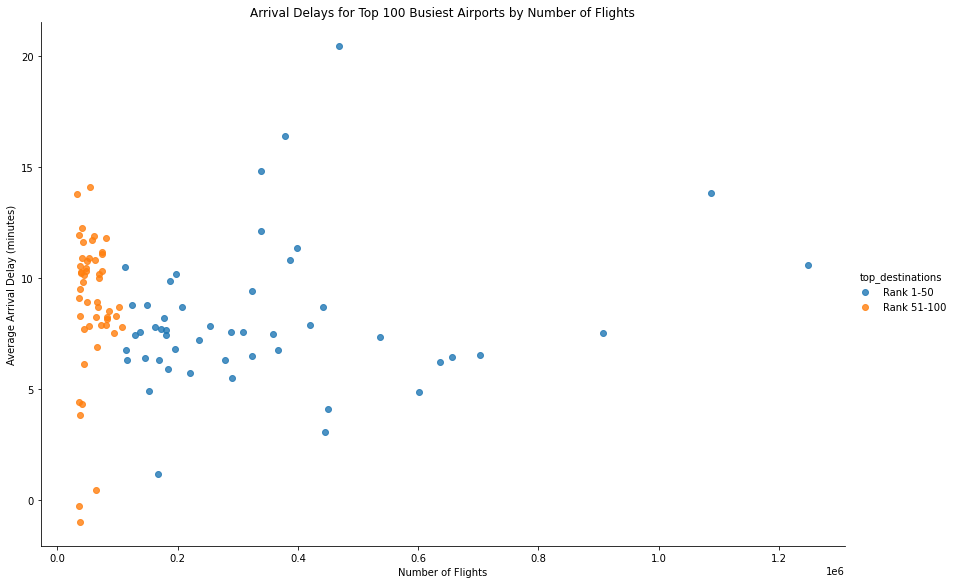

In [40]:
#Define scatter plot with color used for ranking 
plot=sb.FacetGrid(data=delay_destination,hue='top_destinations',hue_order=['Rank 1-50','Rank 51-100'],size=8,aspect=1.5)
plot=plot.map(sb.regplot,'flights','avg_arrival_delay',x_jitter=0.4,fit_reg=False)
plot.add_legend()
chart_labels('Number of Flights','Average Arrival Delay (minutes)','Arrival Delays for Top 100 Busiest Airports by Number of Flights')

The graph above shows that for the top 50 busiest destinations, the number of flights does have an effect on average arrival delay. This is not so much true for less busy airports that rank from 51-100.

## 15th Plot

### What is the trend of each type of delay from month to month? Which type of delay contributes the most to flight delays? Is there a lot of variation in any of these?

In [41]:
#Creating dataframes that will group each delay by month and calculate average delay for each
carrier_by_month=df_data.query('carrier_delay>0').groupby('month')['carrier_delay'].mean().reset_index(name='carrier_delay')
weather_by_month=df_data.query('weather_delay>0').groupby('month')['weather_delay'].mean().reset_index(name='weather_delay')
nas_by_month=df_data.query('nas_delay>0').groupby('month')['nas_delay'].mean().reset_index(name='nas_delay')
security_by_month=df_data.query('security_delay>0').groupby('month')['security_delay'].mean().reset_index(name='security_delay')
lateaircraft_by_month=df_data.query('late_aircraft_delay>0').groupby('month')['late_aircraft_delay'].mean().reset_index(name='late_aircraft_delay')

In [42]:
#Joining all these dataframes into one
temp=carrier_by_month.merge(weather_by_month,on='month')
temp=temp.merge(nas_by_month,on='month')
temp=temp.merge(security_by_month,on='month')
delays_by_month=temp.merge(lateaircraft_by_month,on='month')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


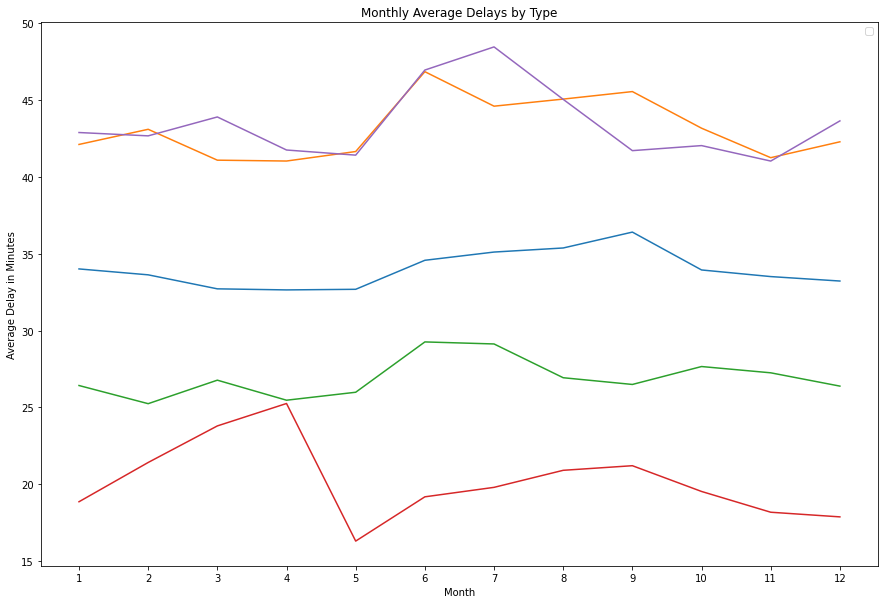

In [43]:
#Define line plot

plt.figure(figsize=(15,10))
plt.errorbar(x=delays_by_month.month,y=delays_by_month.carrier_delay)
plt.errorbar(x=delays_by_month.month,y=delays_by_month.weather_delay)
plt.errorbar(x=delays_by_month.month,y=delays_by_month.nas_delay)
plt.errorbar(x=delays_by_month.month,y=delays_by_month.security_delay)
plt.errorbar(x=delays_by_month.month,y=delays_by_month.late_aircraft_delay)
plt.legend(loc='upper right')

chart_labels('Month','Average Delay in Minutes','Monthly Average Delays by Type')
plt.xticks(delays_by_month.month);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?



> It can be observed that there is large variation in delays for these from month to month.

### Were there any interesting or surprising interactions between features?

> From the graph above, it can also be seen that both weather and aircraft related delays contribute more to overall delays as compared to others.

## Conclusions
>Delays due to security reasons is the least common with less variation.

>Multivariate analysis further supports the finding that weather conditions were the top reasons for delays. It can also be seen that longer flights with longer distances experience longer arrival (average) delays than shorter flights.
